In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data Retrieval
ramen_df = pd.read_csv("./ramen-ratings.csv")
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [3]:
# Data Cleaning
ramen_df.drop(ramen_df[ramen_df["Stars"] == "Unrated"].index, inplace=True)
ramen_df.reset_index(inplace=True)
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     2577 non-null   int64 
 1   Review #  2577 non-null   int64 
 2   Brand     2577 non-null   object
 3   Variety   2577 non-null   object
 4   Style     2575 non-null   object
 5   Country   2577 non-null   object
 6   Stars     2577 non-null   object
 7   Top Ten   41 non-null     object
dtypes: int64(2), object(6)
memory usage: 161.2+ KB


### 2. What flavor or main ingredients used in ramen are often distinguished as good types of instant ramen?
To be able to answer this question, the top occurring keywords will be considered as the ingredients in the ramen provided in the dataset. Then, an average rating will be calculated based on those observations grouped based on the top keywords, finding the overall best flavors for good instant ramen.

First, we must determine the keywords that are being prevalent inside the dataset. In this scenario, the ingredients being found will be from the `Variety` column, searching for certain flavor/ingredient keywords located in it.

In [4]:
#Splitting of Variety into keywords
variety = pd.Series(' '.join(ramen_df['Variety']).lower().split())
variety

0               t's
1        restaurant
2         tantanmen
3           noodles
4             spicy
            ...    
12088           yum
12089         chili
12090        flavor
12091          miso
12092         ramen
Length: 12093, dtype: object

Now that the keywords are found, we can use them to find the most occurring keywords in the set.

In [5]:
pd.set_option("max_rows", None)
counter = variety.value_counts()[:100]
counter

noodles       674
noodle        513
instant       446
flavour       404
ramen         340
chicken       325
flavor        318
spicy         273
beef          233
cup           197
soup          195
with          170
sauce         144
rice          143
artificial    133
curry         127
shrimp        126
&             125
tom           124
mi            123
hot           115
seafood       109
pork          101
bowl          100
style          89
yum            83
goreng         78
udon           77
vermicelli     59
demae          58
oriental       57
sesame         56
penang         54
vegetable      53
tonkotsu       53
yakisoba       50
mushroom       48
vegetarian     47
rasa           46
ramyun         45
soy            43
sour           43
kimchi         42
miso           42
chow           41
black          41
big            39
fried          38
shoyu          38
mein           37
japanese       37
king           36
creamy         36
onion          36
super          35
thai      

Based on the counter for ingredients, we can determine the top most occurring keywords. We shall not include keywords that define specific ingredients such as noodles, instant, or flavour. By removing these out of the list, the top 10 ingredients are:
1. Chicken
2. Spicy
3. Beef
4. Curry
5. Shrimp
6. Tom (which is known as Tom Yum)
7. Seafood
8. Pork
9. Sesame
10. Vegetable/Vegetarian

We decided to **NOT** include the type of noodle as we wanted to prioritize on the flavor of the instant ramens. We also took note of using **Vegetarian** as part of **Vegetable** to further improve its accuracy.

But first, since the `Stars` column does not have a float data type, we must convert the ratings to float for proper calculation.

In [6]:
#Additional Data Cleaning
ramen_df["Stars"] = pd.to_numeric(ramen_df["Stars"], downcast="float", errors = 'coerce')

After obtaining the top keywords, each will be used to find the observations and to determine the average ratings for each respective keyword.

In [7]:
#Chicken
chicken_df = ramen_df[ramen_df['Variety'].str.contains('chicken', case=False)]
chicken_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.250,NaN
35,36,2544,Lipton,Cup-A-Soup Chicken Noodle With White Meat Inst...,Box,USA,1.500,NaN
38,39,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5.000,NaN
44,45,2535,Nissin,Cup Noodles Very Veggie Chicken Flavor Ramen N...,Cup,USA,5.000,NaN
51,52,2528,Prima,Juzz's Mee Creamy Chicken Flavour (Export Vers...,Pack,Singapore,5.000,NaN
66,67,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.500,NaN
73,74,2506,KOKA,Delight Chicken Flavor Instant Non-Fried Noodles,Pack,Singapore,3.750,NaN
77,78,2502,Indomie,Onion Chicken Flavor,Pack,Nigeria,1.500,NaN
80,81,2499,KOKA,Creamy Soup With Crushed Noodles Chicken Flavor,Cup,Singapore,5.000,NaN
84,85,2495,Nissin,Cup Noodles Huhn (Chicken),Cup,Germany,3.750,NaN


In [8]:
chicken_avg = chicken_df["Stars"].mean()
chicken_df.agg({"Stars": ['count', 'mean']})

,Stars
count,328.000000
mean,3.394588


In [9]:
#Spicy
spicy_df = ramen_df[ramen_df['Variety'].str.contains('spicy', case=False)]
spicy_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1,1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.000,NaN
9,9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.500,NaN
32,33,2547,Sichuan Guangyou,Chongqing Spicy Hot Noodles,Bowl,China,4.000,NaN
38,39,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5.000,NaN
39,40,2540,Wei Lih,GGE Noodle Snack Wheat Crackers Mexican Spicy,Pack,Taiwan,3.250,NaN
64,65,2515,Uni-President,Man Han Feast Spicy Beef Flavor Instant Noodles,Bowl,Taiwan,5.000,NaN
81,82,2498,Nissin,Demae Ramen Spicy Beef,Pack,Germany,3.750,NaN
82,83,2497,Nissin,Cup Noodles Spicy,Cup,Germany,3.750,NaN
93,94,2486,Nissin,Demae Ramen Spicy,Pack,Germany,3.500,NaN
104,105,2475,Maruchan,Seimen Red Spicy Dandan Men,Bowl,Japan,4.750,NaN


In [10]:
spicy_avg = spicy_df["Stars"].mean()
spicy_df.agg({"Stars": ['count', 'mean']})

,Stars
count,270.000000
mean,3.688426


In [11]:
#Beef
beef_df = ramen_df[ramen_df['Variety'].str.contains('beef', case=False)]
beef_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
21,21,2559,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.000,NaN
26,26,2554,Yum-Mie,Instant Noodles Beef In Light Soup Flavour,Pack,Ghana,3.500,NaN
41,42,2538,Nissin,Cup Noodles Very Veggie Beef Flavor Ramen Nood...,Cup,USA,5.000,NaN
43,44,2536,Lele,Instant Noodles Beef,Pack,Ghana,3.500,NaN
48,49,2531,Uni-President,Pickled Cabbage Beef,Pack,China,4.250,NaN
64,65,2515,Uni-President,Man Han Feast Spicy Beef Flavor Instant Noodles,Bowl,Taiwan,5.000,NaN
81,82,2498,Nissin,Demae Ramen Spicy Beef,Pack,Germany,3.750,NaN
92,93,2487,Nissin,Soba Sukiyaki Beef,Cup,Germany,4.500,NaN
124,126,2454,KOKA,Silk Beef Pho Flavor Instant Rice Fettuccine,Bowl,Singapore,3.250,NaN
139,141,2439,Uni-President,Man Han Feast Super Hot Pot Beef Flavor Instan...,Bowl,Taiwan,5.000,NaN


In [12]:
beef_avg = beef_df["Stars"].mean()
beef_df.agg({"Stars": ['count', 'mean']})

,Stars
count,232.00000
mean,3.50959


In [13]:
#Curry
curry_df = ramen_df[ramen_df['Variety'].str.contains('curry', case=False)]
curry_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
4,4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
28,28,2552,MyKuali,Penang White Curry Rice Vermicelli Soup,Bowl,Malaysia,5.00,NaN
36,37,2543,KOKA,Curry Flavour Instant Noodles,Cup,Singapore,5.00,NaN
54,55,2525,Sokensha,Curry Udon,Pack,Japan,3.50,NaN
57,58,2522,Takamori,Hearty Japanese Style Curry Udon,Pack,Japan,5.00,NaN
86,87,2493,Nissin,Cup Noodles Curry,Cup,Germany,3.75,NaN
106,107,2473,Tokyo Noodle,Mini Instant Noodle Mild Curry Flavor,Pack,Japan,2.00,NaN
110,111,2469,KOKA,Signature Curry Flavor Instant Noodles,Cup,Singapore,3.50,NaN
112,113,2467,Paldo,Volcano Curry Kkokkomyun,Pack,South Korea,3.50,NaN
132,134,2446,KOKA,Creamy Soup Witrh Crushed Noodles Curry Flavor,Cup,Singapore,5.00,NaN


In [14]:
curry_avg = curry_df["Stars"].mean()
curry_df.agg({"Stars": ['count', 'mean']})

,Stars
count,126.000000
mean,4.121032


In [15]:
#Shrimp
shrimp_df = ramen_df[ramen_df['Variety'].str.contains('shrimp', case=False)]
shrimp_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
42,43,2537,Nissin,Cup NoodlesTom Yam Seafood (More Shrimptacular),Cup,Singapore,5.00,NaN
94,95,2485,Nissin,Cup Noodles Shrimps,Cup,Germany,3.00,NaN
166,168,2412,Shirakiku,Sanukiya Udon Shrimp Flavor,Pack,USA,3.25,NaN
199,201,2379,Nissin,Cup Noodles Hot & Spicy Shrimp Flavor Ramen No...,Cup,USA,2.50,NaN
222,224,2356,Nongshim,Spicy Shrimp Cup Noodle,Cup,South Korea,4.00,NaN
261,263,2317,MAMA,Instant Bowl Noodles Shrimp (Tom Yum) Flavor Base,Bowl,Thailand,4.00,NaN
302,304,2276,Nissin,Cup Noodles With Shrimp Ramen Noodle Soup (New...,Cup,USA,3.00,NaN
343,345,2235,Fashion Food,Tom Yum Shrimp Creamy Flavour Instant Noodles,Bowl,Thailand,4.00,NaN
382,384,2196,Mr. Lee's Noodles,Warrior Fighting Shrimp,Cup,UK,3.30,NaN
455,457,2123,Nissin,Cup Noodles Tom Yum Shrimp Sabb Flavour,Cup,Thailand,5.00,NaN


In [16]:
shrimp_avg = shrimp_df["Stars"].mean()
shrimp_df.agg({"Stars": ['count', 'mean']})

,Stars
count,129.000000
mean,3.533333


In [17]:
#Tom (Tom Yum/Tom Yam)
tom_df = ramen_df[(ramen_df['Variety'].str.contains('tom yam', case=False)) | (ramen_df['Variety'].str.contains('tom yum', case=False))]
tom_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
10,10,2570,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5.00,NaN
29,29,2551,KOKA,Signature Tom Yum Flavor Instant Noodles,Pack,Singapore,4.00,NaN
42,43,2537,Nissin,Cup NoodlesTom Yam Seafood (More Shrimptacular),Cup,Singapore,5.00,NaN
69,70,2510,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5.00,NaN
79,80,2500,The Ramen Rater Select,Supreme Creamy Tom Yum Noodle,Box,Malaysia,5.00,NaN
91,92,2488,Nissin,Demae Ramen Thai Tom Yum,Pack,Germany,3.75,NaN
159,161,2419,MyKuali,Penang Red Tom Yum Goong,Box,Japan,5.00,NaN
178,180,2400,Nissin,Cup Noodles Tom Yam Seafood Flavour,Cup,Singapore,5.00,NaN
186,188,2392,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup,Bowl,Malaysia,5.00,NaN
261,263,2317,MAMA,Instant Bowl Noodles Shrimp (Tom Yum) Flavor Base,Bowl,Thailand,4.00,NaN


In [18]:
tom_avg = tom_df["Stars"].mean()
tom_df.agg({"Stars": ['count', 'mean']})

,Stars
count,117.000000
mean,3.807692


In [19]:
#Seafood
seafood_df = ramen_df[ramen_df['Variety'].str.contains('seafood', case=False)]
seafood_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
42,43,2537,Nissin,Cup NoodlesTom Yam Seafood (More Shrimptacular),Cup,Singapore,5.00,NaN
108,109,2471,Nissin,Cup Noodles Mini Seafood Flavour,Cup,Hong Kong,5.00,NaN
114,115,2465,Nissin,Cup Noodles XO Sauce Seafood,Cup,China,3.75,NaN
120,121,2459,Nissin,Cup Noodles MUG Shoyu & Seafood,Pack,Japan,3.50,NaN
130,132,2448,KOKA,Seafood Flavor Instant Noodles,Cup,Singapore,3.50,NaN
146,148,2432,Fashion Food,Yummy Spicy Rice Soup With Seafood,Bowl,Thailand,3.50,NaN
153,155,2425,Nissin,Seafood Flavour Rice Vermicelli,Cup,Hong Kong,5.00,NaN
158,160,2420,Nissin,Cup Noodles Spicy Seafood Flavor,Cup,China,3.75,NaN
169,171,2409,Mama Pat's,Seafood Gumbo Flavor Instant Ramen Noodles,Pack,USA,3.50,NaN
173,175,2405,Nissin,Cup Noodles Mini Spicy Seafood,Cup,Hong Kong,4.00,NaN


In [20]:
seafood_avg = seafood_df["Stars"].mean()
seafood_df.agg({"Stars": ['count', 'mean']})

,Stars
count,110.000000
mean,3.781818


In [21]:
#Pork
pork_df = ramen_df[ramen_df['Variety'].str.contains('pork', case=False)]
pork_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
13,13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.500,NaN
99,100,2480,Acecook,Pork Wantan Men,Bowl,Japan,4.250,NaN
138,140,2440,Master Kong,Roasted Pork Noodle,Pack,China,4.500,NaN
142,144,2436,Kang Shi Fu,Artificial Dongpo's Braised Pork Flavour,Pack,Hong Kong,4.750,NaN
188,190,2390,Nissin,Rice Vermicelli Pickled Vegetable Pork Flavour,Cup,Hong Kong,3.750,NaN
203,205,2375,Uni-President,Man Han Feast Braised Pork Flavor Instant Noodles,Bowl,Taiwan,5.000,NaN
226,228,2352,Uni-President,Minced Pork Flavor Instant Noodles,Pack,Taiwan,1.000,NaN
295,297,2283,Nissin,Raoh Pork Bone Soy Soup Noodle,Pack,Japan,5.000,NaN
360,362,2218,Tseng Noodles,Spicy Braised Pork Flavor,Pack,Taiwan,4.000,NaN
365,367,2213,Acecook,Oh! Ricey Pork Flavour,Pack,Vietnam,4.000,NaN


In [22]:
pork_avg = pork_df["Stars"].mean()
pork_df.agg({"Stars": ['count', 'mean']})

,Stars
count,102.00000
mean,3.48701


In [23]:
#Sesame
sesame_df = ramen_df[ramen_df['Variety'].str.contains('sesame', case=False)]
sesame_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1,1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
117,118,2462,TTL,Sesame Oil Chicken Noodle With Rice Wine,Bowl,Taiwan,5.00,NaN
125,127,2453,KOKA,Delight Spicy Sesame Flavor Instant Non-Fried ...,Pack,Singapore,4.50,NaN
150,152,2428,TTL,Sesame Oil Chicken With Rice Wine Noodle,Bowl,Taiwan,5.00,NaN
191,193,2387,Nissin,Demae Iccho Sesame Oil Flavour Instant Noodle,Bowl,Hong Kong,3.50,NaN
265,267,2313,Xiao Ban Mian,Sesame Oil With Garlic Flavor Thin Noodle,Pack,Taiwan,3.50,NaN
267,269,2311,Xiao Ban Mian,Sesame Sauce Matcha Noodle,Pack,Taiwan,3.80,NaN
389,391,2189,Nissin,Demae Ramen Sesame Oil Flavour Cup,Cup,Hong Kong,4.00,NaN
424,426,2154,Jingqi,Black Eyes Bean Original Noodle With Sesame Sauce,Pack,Taiwan,4.00,NaN
427,429,2151,Jingqi,Aloe Vera Guan Mian Original Noodle With Sesam...,Pack,Taiwan,5.00,NaN


In [24]:
sesame_avg = sesame_df["Stars"].mean()
sesame_df.agg({"Stars": ['count', 'mean']})

,Stars
count,54.000000
mean,3.894444


In [25]:
#Vegetable/Vegetarian
veggie_df = ramen_df[(ramen_df['Variety'].str.contains('vegetable', case=False)) | (ramen_df['Variety'].str.contains('vegetarian', case=False))]
veggie_df

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
188,190,2390,Nissin,Rice Vermicelli Pickled Vegetable Pork Flavour,Cup,Hong Kong,3.75,NaN
314,316,2264,Unif Tung-I,Instant Vegetarian Beehoon Rice Vermicelli,Pack,Taiwan,1.00,NaN
336,338,2242,Great Value,Beef Style Noodles With Vegetables,Cup,Canada,3.00,NaN
356,358,2222,Nyor Nyar,Vegetarian Penang White Curry,Pack,Malaysia,5.00,NaN
378,380,2200,Mr. Lee's Noodles,Shaolin Monk Vegetables,Cup,UK,5.00,NaN
401,403,2177,MAMA,Instant Rice Noodles Vegetable Flavour,Pack,Thailand,4.00,NaN
409,411,2169,Happy Family,Vegetable Flavour Instant Noodles,Pack,Singapore,4.00,NaN
411,413,2167,Great Value,Vegetable Flavour Noodles With Vegetables,Cup,Canada,3.00,NaN
414,416,2164,Tseng Noodles,Rice Noodle Chinese Mushroom With Soybean Vege...,Pack,Taiwan,5.00,NaN


In [26]:
veggie_avg = veggie_df["Stars"].mean()
veggie_df.agg({"Stars": ['count', 'mean']})

,Stars
count,114.000000
mean,3.204386


In [27]:
ramen_flavors = pd.DataFrame( \
    {"Average Ratings": [chicken_avg, spicy_avg, beef_avg, curry_avg, shrimp_avg, tom_avg, seafood_avg, pork_avg, sesame_avg, veggie_avg]}, \
    index = ['Chicken', 'Spicy', 'Beef', 'Curry', 'Shrimp', 'Tom Yum/Tom Yam', 'Seafood', 'Pork', 'Sesame', 'Veggie'])

Text(0.5, 1.0, 'Average Rating of Top 10 Most Occurring Flavor/Ingredient of Instant Ramen')

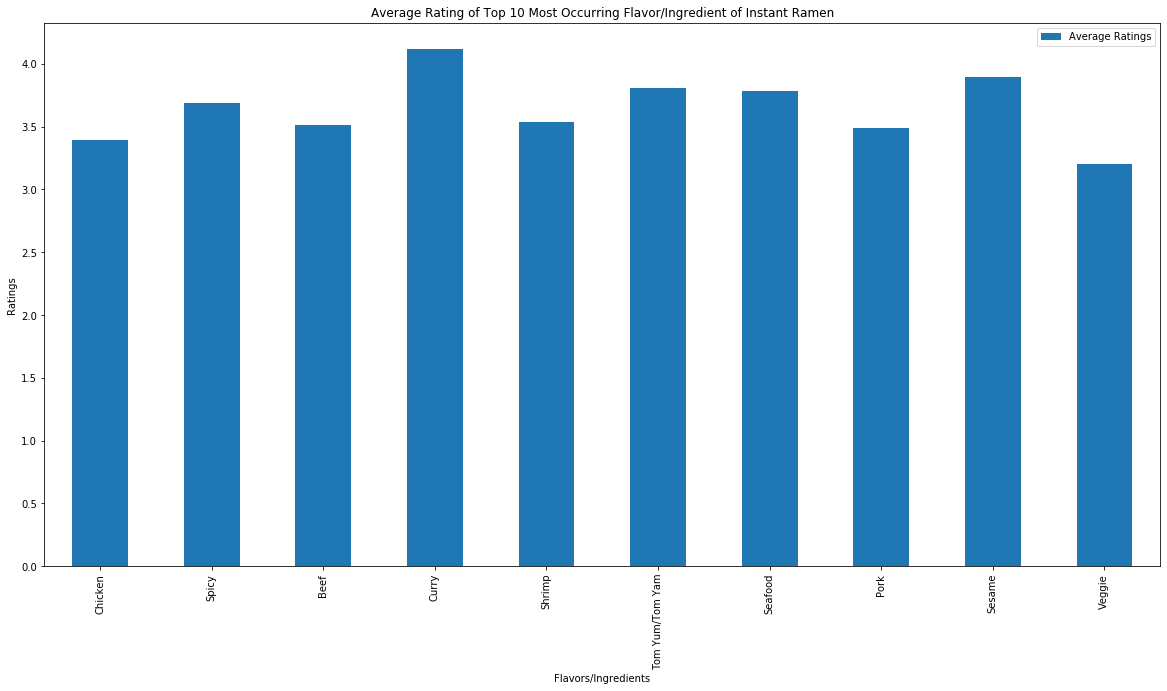

In [28]:
ramen_flavors.plot(kind="bar", figsize=(20,10))
plt.xlabel('Flavors/Ingredients')
plt.ylabel('Ratings')
plt.title('Average Rating of Top 10 Most Occurring Flavor/Ingredient of Instant Ramen')